In [ ]:
__nbid__ = '0011'
__author__ = 'Ragadeepika Pucha <rpucha@arizona.edu>, Stephanie Juneau <stephanie.juneau@noirlab.edu>'
__version__ = '20250819' # yyyymmdd
__datasets__ = ['sdss_dr12', 'sdss_dr16']
__keywords__ = ['sdss spectra', 'spectra stacking', 'sparcl']

# Apilado de Espectros SDSS de Galaxias Seleccionadas del Diagrama BPT

*Ragadeepika Pucha (U.Arizona), Stéphanie Juneau (NOIRLab) & El equipo de Astro Data Lab*

### Tabla de Contenido
* [Objetivos y Resumen](#goals)
* [Avisos y Atribuciones](#attribution)
* [Imports y Configuración](#import)
* [Autenticación](#auth)
* [Catálogo de Líneas de Emisión del Grupo Portsmouth](#ports)
* [Espectros SDSS](#sdss)
    * [Funciones para Acceder y Graficar los Espectros](#functions1)
    * [Graficado de los Espectros](#plot_spectra)
* [Fuentes de Ionización y el Diagrama BPT](#bpt)
* [Apilado de Espectros](#stack_spectra)
    * [Función para Alinear y Apilar Espectros](#functions2)
    * [Selección de Galaxias desde el Diagrama BPT](#select_bpt)
    * [Graficado de Espectros Apilados](#plot_stack)
* [Recursos y Referencias](#resources)

<a class="anchor" id="goals"></a>
# Objetivos
En este notebook, mostraremos cómo acceder y graficar espectros de galaxias SDSS (o cualquier objeto SDSS dado su `specobjid`) usando [SPARCL](https://astrosparcl.datalab.noirlab.edu/sparc/) (SPectral Analysis and Retrievable Catalog Lab). Además, seleccionamos galaxias de líneas de emisión basadas en su clasificación en un diagrama BPT (llamado así por "Baldwin, Phillips & Terlevich", autores del artículo ([Baldwin et. al., 1981](https://ui.adsabs.harvard.edu/abs/1981PASP...93....5B/abstract)) que introdujo este concepto), y apilamos sus espectros.

# Resumen
Los espectros de galaxias nos proporcionan abundante información sobre las propiedades estelares, de gas y de polvo de las galaxias. Los espectros SDSS están alojados en Astro Data Lab y pueden ser accedidos directamente desde la interfaz de Jupyter notebook. A continuación, mostramos cómo acceder al espectro de un objeto dado. También proporcionamos una funcionalidad que puede ser utilizada para sobreponer líneas de emisión/absorción en los espectros.  

Las diferentes líneas de emisión en los espectros brindan información sobre procesos de ionización que ocurren en las galaxias. Estos procesos incluyen formación estelar (SF), acreción en un núcleo galáctico activo (AGN), y choques. Usando el diagrama BPT tradicional, las galaxias pueden dividirse en cuatro clases diferentes:  
1. De formación estelar (SF)  
2. Seyfert  
3. LINER  
4. Compuestas  

Puede ser útil apilar espectros de galaxias para estudiar las líneas de emisión y otras características espectrales con mayor claridad. El apilado de espectros ayuda a incrementar la relación señal/ruido, lo cual a su vez permite detectar firmas espectrales débiles y estudiar mejor las propiedades promedio de las galaxias involucradas en el apilado. En este notebook, apilamos los espectros de galaxias seleccionadas de cada una de las cuatro clases BPT y comparamos sus líneas de emisión y propiedades espectrales generales.

<a class="anchor" id="attribution"></a>
# Avisos Legales y atribuciones

Avisos Legales
-----------
Tome en cuenta que usar el Astro Data Lab constituye un acuerdo con nuestros [Avisos Legales](https://datalab.noirlab.edu/disclaimers.php) mínimos.

Reconocimientos
---------------
Si ud. usa el **Astro Data Lab** en sus publicaciones de investigación, por favor incluya el siguiente texto en la sección de Reconocimientos de su publicaciones:

_Esta investigación utiliza servicios de datos proveeidos por el Astro Data Lab, el cual es parte del Programa "Community Science and Data Center" (CSDC) (Centro de Ciencia Comunitaria y Datos) del NSF NOIRLab. NOIRLab es operado por la "Association of Universities for Research in Astronomy (AURA), Inc."(Asociación de Universidaddes para la Investigación en Astronomía, Inc.), bajo un acuerdo de cooperación con la "U.S. National Science Foundation" (Fundación Nacional de Ciencia de los EE. UU.)._

Si utiliza **SPARCL junto con la plataforma de Astro Data Lab** (por medio de JupyterLab, línea de comando o interfaz de la web) en su publicación de investigación, por favor incluya el siguiente texto en la sección de Reconocimientos de su publicaciones:

_Esta investigación utiliza servicios o datos proporcionados por el "SPectra Analysis and Retrievable Catalog Lab" (SPARCL) (Laboratorio de Análisis y Catálogo Recuperable de Espectros) y el Astro Data Lab, ambos pertenecientes al Programa "Community Science and Data Center" (CSDC) (Centro de Ciencia Comunitaria y Datos) de NSF NOIRLab. NOIRLab es operado por la "Association of Universities for Research in Astronomy (AURA), Inc." (Asociación de Universidades para la Investigación en Astronomía, Inc.), bajo un acuerdo de cooperación con la "U.S. National Science Foundation" (Fundación Nacional de Ciencia de los EE. UU.)._

En cualquiera de los casos, **por favor cite las siguientes publicaciones**:

* Publicación del concepto de Data Lab: Fitzpatrick et al., "The NOAO Data Laboratory: a conceptual overview", SPIE, 9149, 2014, https://doi.org/10.1117/12.2057445

* Descripción general del Astro Data Lab: Nikutta et al., "Data Lab - A Community Science Platform", Astronomy and Computing, 33, 2020, https://doi.org/10.1016/j.ascom.2020.100411.

Si hace referencia al Jupyterlab / Jupyter notebooks de Data Lab, cite:

* Juneau et al., "Jupyter-Enabled Astrophysical Analysis Using Data-Proximate Computing Platforms", CiSE, 23, 15, 2021, https://doi.org/10.1109/MCSE.2021.3057097.

Si publica en una revista de la AAS, agregue también la palabra clave `\facility{Astro Data Lab}`

Y si está usando SPARCL, por vor agregue también `\software{SPARCL}` y cite:

* Juneau et al., "SPARCL: SPectra Analysis and Retrievable Catalog Lab", Conference Proceedings for ADASS XXXIII, 2024
https://doi.org/10.48550/arXiv.2401.05576.

La biblioteca de NOIRLab mantiene [listas de reconocimientos apropiados](https://noirlab.edu/science/about/scientific-acknowledgments) para usar cuando se hacen publicaciones utilizando los recursos, servicios o datos del Laboratorio.

---- **Versión en Inglés** ----


# Disclaimer & attribution

Disclaimers
-----------
Note that using the Astro Data Lab constitutes your agreement with our minimal [Disclaimers](https://datalab.noirlab.edu/disclaimers.php).

Acknowledgments
---------------
If you use **Astro Data Lab** in your published research, please include the text in your paper's Acknowledgments section:

_This research uses services or data provided by the Astro Data Lab, which is part of the Community Science and Data Center (CSDC) Program of NSF NOIRLab. NOIRLab is operated by the Association of Universities for Research in Astronomy (AURA), Inc. under a cooperative agreement with the U.S. National Science Foundation._

If you use **SPARCL jointly with the Astro Data Lab platform** (via JupyterLab, command-line, or web interface) in your published research, please include this text below in your paper's Acknowledgments section:

_This research uses services or data provided by the SPectra Analysis and Retrievable Catalog Lab (SPARCL) and the Astro Data Lab, which are both part of the Community Science and Data Center (CSDC) Program of NSF NOIRLab. NOIRLab is operated by the Association of Universities for Research in Astronomy (AURA), Inc. under a cooperative agreement with the U.S. National Science Foundation._

In either case **please cite the following papers**:

* Data Lab concept paper: Fitzpatrick et al., "The NOAO Data Laboratory: a conceptual overview", SPIE, 9149, 2014, https://doi.org/10.1117/12.2057445

* Astro Data Lab overview: Nikutta et al., "Data Lab - A Community Science Platform", Astronomy and Computing, 33, 2020, https://doi.org/10.1016/j.ascom.2020.100411

If you are referring to the Data Lab JupyterLab / Jupyter Notebooks, cite:

* Juneau et al., "Jupyter-Enabled Astrophysical Analysis Using Data-Proximate Computing Platforms", CiSE, 23, 15, 2021, https://doi.org/10.1109/MCSE.2021.3057097

If publishing in a AAS journal, also add the keyword: `\facility{Astro Data Lab}`

And if you are using SPARCL, please also add `\software{SPARCL}` and cite:

* Juneau et al., "SPARCL: SPectra Analysis and Retrievable Catalog Lab", Conference Proceedings for ADASS XXXIII, 2024
https://doi.org/10.48550/arXiv.2401.05576

The NOIRLab Library maintains [lists of proper acknowledgments](https://noirlab.edu/science/about/scientific-acknowledgments) to use when publishing papers using the Lab's facilities, data, or services.

<a class="anchor" id="import"></a>
# Importaciones y configuración

In [1]:
# Librerías estándar
from getpass import getpass
import random

# De 3ros
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import matplotlib
%matplotlib inline

# Data Lab
from dl import authClient as ac, queryClient as qc, storeClient as sc
from sparcl.client import SparclClient

<a class="anchor" id="auth"></a>
# Autenticación
Se puede acceder a gran parte de la funcionalidad de Data Lab sin iniciar sesión explícitamente (el servicio utiliza un inicio de sesión anónimo). Sin embargo, algunas funciones, como guardar los resultados de las consultas en el espacio de almacenamiento virtual, requieren iniciar sesión (es decir, necesitará una cuenta de usuario registrada).

Si necesita iniciar sesión en Data Lab, descomente la celda a continuación y ejecútela:

In [ ]:
#token = ac.login(input("Ingrese su nombre de usuario: (+ENTER) "),getpass("Ingrese su contraseña:: (+ENTER) "))
#ac.whoAmI()

In [2]:
## Configuración de gráficos

# Tamaño de fuente
font = {'size':22}
matplotlib.rc('font', **font)

# Ancho de ejes
width = {'linewidth':3.0}
matplotlib.rc('axes', **width)

# Marcas de x e y
ticks = {'major.size':6.0, 'minor.size':4.0, 'major.width':3.0, 'minor.width':1.5, 'direction':'in',\
        'minor.visible':True}
matplotlib.rc('xtick', **ticks)
matplotlib.rc('ytick', **ticks)

# Incluir marcas en la parte superior y derecha
plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.right'] = True

In [3]:
## Cliente SPARCL
client = SparclClient()

<a class="anchor" id="ports"></a>
# Emission lines catalog from Portsmouth group

# Catálogo de líneas de emisión del grupo Portsmouth

El grupo Portsmouth creó un Catálogo de Valor Añadido (VAC) de cinemática estelar y flujos de líneas de emisión para las galaxias de SDSS DR12 ([Thomas et al. 2013](https://ui.adsabs.harvard.edu/abs/2013MNRAS.431.1383T/abstract)), basado en los modelos de poblaciones estelares de [Maraston & Strömbäck (2011)](https://ui.adsabs.harvard.edu/abs/2011MNRAS.418.2785M/abstract).  
Ellos usan una adaptación del código público Gas AND Absorption Line Fitting (GANDALF; [Sarzi et al. 2006](https://ui.adsabs.harvard.edu/abs/2006MNRAS.366.1151S/abstract)) para ajustar plantillas de poblaciones estelares y de líneas de emisión gaussianas a los espectros de BOSS.  
El código determina la cinemática del gas (velocidad y dispersión de velocidad), los flujos de las líneas de emisión y los anchos equivalentes a partir de las plantillas resultantes.  

Más información sobre la cinemática estelar de Portsmouth y los flujos de líneas de emisión se puede encontrar [aquí](https://www.sdss.org/dr16/spectro/galaxy_portsmouth/#kinematics).

Podemos acceder a este catálogo (''emissionlinesport'') desde la base de datos de SDSS DR12 (`sdss_dr12.emissionlinesport`).  
La lista y definiciones de las columnas están disponibles tanto en el [Data Lab Table Browser](https://datalab.noirlab.edu/query.php?name=sdss_dr12.emissionlinesport) como en la [página de SDSS Skyserver](http://skyserver.sdss.org/dr16/en/help/browser/browser.aspx#&&history=description+emissionLinesPort+U).  
Para graficar el diagrama BPT tradicional, necesitamos cuatro líneas de emisión: H$\alpha~\lambda$6562, H$\beta~\lambda$4861, [OIII]$\lambda$5006 y [NII]$\lambda$6583.  
Además de estas columnas, también consideramos la columna `bpt`, que clasifica las galaxias en "Star Forming", "Seyfert", "LINER", "Seyfert/LINER", "Composite", basado en el esquema de clasificación de [Kauffmann et al. 2003](https://ui.adsabs.harvard.edu/abs/2003MNRAS.346.1055K/abstract), [Kewley et al. 2001](https://ui.adsabs.harvard.edu/abs/2001ApJ...556..121K/abstract) y [Schawinski et al. 2007](https://ui.adsabs.harvard.edu/abs/2007MNRAS.382.1415S/abstract).  


In [4]:
# Lista de líneas de emisión que nos interesan -
emission_lines = ('Hb_4861', 'OIII_5006', 'Ha_6562', 'NII_6583')

# Creando una lista de columnas para todas las líneas de emisión para Flux, Flux_Err y Aon de cada una -
selected_columns_sdss = ', \n'.join(['E.Flux_{0}, E.Flux_{0}_Err, E.Aon_{0}'.format(e) for e in emission_lines])

# Condiciones -
# Condiciones sobre los errores de flujo (errores de flujo > 0 y errores de flujo != Infinity)
err_cond_sdss = ' AND \n'.join(['(E.Flux_{0}_Err > 0) AND (E.Flux_{0}_Err != \'Infinity\')'.format(e) for e in emission_lines])
# Condiciones sobre la relación Señal a Ruido de todas las líneas de emisión
sn_cond_sdss = ' AND \n'.join(['(E.Flux_{0}/E.Flux_{0}_Err > 5)'.format(e) for e in emission_lines])

El catálogo `emissionlinesport` contiene varios duplicados como resultado de incluir toda la información correspondiente a todos los espectros de todas las fuentes.  
Esto incluye algunos espectros malos, así como espectros repetidos del mismo objeto observados en varias noches (diferentes MJD).  
Para seleccionar solo los mejores espectros de objetos únicos, unimos esta tabla con la tabla `specobj` de SDSS DR16, que contiene únicamente objetos con espectros primarios (con `sciencePrimary > 0`). 

In [5]:
# Escribir una consulta para las líneas de emisión del catálogo emissionlinesport de SDSS DR12
# Aplicando el corte de S/N >= 5 para las cuatro líneas de emisión
# También aplicando la condición de que todos los errores de flujo sean >0 y != infinity.
# Aplicando condición en el corrimiento al rojo - solo seleccionando galaxias con 0.02 <= z <= 0.2
# Agregamos la columna bpt - que marca la clase de la galaxia basada en su posición en el Diagrama BPT
# Usamos sdss_joinid para unir con SDSS DR16
# Esto es para obtener el specobjid de SDSS DR16 de los objetos - que se usa para acceder a los espectros

query = """
SELECT 
E.ra as ra_sdss, E.dec as dec_sds, E.z, E.bpt,
E.mjd, E.plate, E.fiberid,
%s,
S.specobjid
FROM sdss_dr12.emissionlinesport as E
JOIN sdss_dr16.specobj as S
ON (E.sdss_joinid = S.sdss_joinid) AND (E.mjd = S.mjd)
WHERE (E.z > 0.02) AND (E.z < 0.2) AND
%s AND
%s
""" %(selected_columns_sdss, err_cond_sdss, sn_cond_sdss)

In [6]:
print(query)


SELECT 
E.ra as ra_sdss, E.dec as dec_sds, E.z, E.bpt,
E.mjd, E.plate, E.fiberid,
E.Flux_Hb_4861, E.Flux_Hb_4861_Err, E.Aon_Hb_4861, 
E.Flux_OIII_5006, E.Flux_OIII_5006_Err, E.Aon_OIII_5006, 
E.Flux_Ha_6562, E.Flux_Ha_6562_Err, E.Aon_Ha_6562, 
E.Flux_NII_6583, E.Flux_NII_6583_Err, E.Aon_NII_6583,
S.specobjid
FROM sdss_dr12.emissionlinesport as E
JOIN sdss_dr16.specobj as S
ON (E.sdss_joinid = S.sdss_joinid) AND (E.mjd = S.mjd)
WHERE (E.z > 0.02) AND (E.z < 0.2) AND
(E.Flux_Hb_4861_Err > 0) AND (E.Flux_Hb_4861_Err != 'Infinity') AND 
(E.Flux_OIII_5006_Err > 0) AND (E.Flux_OIII_5006_Err != 'Infinity') AND 
(E.Flux_Ha_6562_Err > 0) AND (E.Flux_Ha_6562_Err != 'Infinity') AND 
(E.Flux_NII_6583_Err > 0) AND (E.Flux_NII_6583_Err != 'Infinity') AND
(E.Flux_Hb_4861/E.Flux_Hb_4861_Err > 5) AND 
(E.Flux_OIII_5006/E.Flux_OIII_5006_Err > 5) AND 
(E.Flux_Ha_6562/E.Flux_Ha_6562_Err > 5) AND 
(E.Flux_NII_6583/E.Flux_NII_6583_Err > 5)



In [7]:
final_table = qc.query(sql=query, fmt = 'table')

<a class="anchor" id="sdss"></a>
# Espectros SDSS

En esta sección, mostraremos cómo acceder y graficar espectros SDSS usando [SPARCL](https://astrosparcl.datalab.noirlab.edu/sparc/), un servicio de acceso espectral provisto por Astro Data Lab. Para acceder al espectro de un objeto, necesitaremos el valor de `specobjid` del objeto. Este codifica información sobre tres identificadores: plate, MJD y fiberID, junto con run2d, que contiene información sobre el pipeline de reducción usado. Cada espectro tiene un valor único plate-MJD-fiberID (aunque algunos objetos observados en diferentes noches/plates podrían tener más de un espectro). La información sobre cómo identificar espectros SDSS se puede encontrar [aquí](https://www.sdss.org/dr16/spectro/spectro_basics/#IdentifyingSDSSspectra).

La información sobre la reducción de datos espectroscópicos de SDSS y los formatos de espectros se encuentra [aquí](https://www.sdss.org/dr16/spectro/pipeline/#SpectroscopicDataReduction).

<a class="anchor" id="functions1"></a>
## Funciones para acceder y graficar espectros SDSS

In [8]:
# Función 1 -

def get_sdss_spectra(specobjid, rest_frame = True):
    """
    Función para acceder a los espectros SDSS de cualquier objeto usando SPARCL.
    
    Devuelve los arreglos de wavelength, flux, model e ivar.
    Devuelve los arreglos en el marco de reposo si rest_frame = True.
    Si rest_frame = False, devuelve los arreglos en el marco observado.
    
    Parámetros
    ----------
    specobjid : int
        Id único del espectro SDSS
        
    rest_frame : bool
        Si devolver o no los valores en el marco de reposo. Por omisión es True.
    
    Devuelve
    --------
    wavelength : array
        Arreglo de longitudes de onda (valores en el marco de reposo si rest_frame = True)
        
    flux : array
        Arreglo de valores de flujo (valores en el marco de reposo si rest_frame = True)
    
    model : array
        Arreglo de valores de modelo (valores en el marco de reposo si rest_frame = True)
        
    ivar : array
        Arreglo de varianza inversa (valores en el marco de reposo si rest_frame = True)

    """
    ## Recuperar los espectros
    res = client.retrieve_by_specid(specid_list = [specobjid], 
                                    include = ['sparcl_id', 'specid', 'redshift', 'flux', 'wavelength', 'model', 'ivar'],
                                    dataset_list = ['SDSS-DR16', 'BOSS-DR16'])
    ## Registro de los espectros
    res_record = res.records[0]
    
    wavelength = res_record.wavelength
    flux = res_record.flux
    model = res_record.model
    ivar = res_record.ivar
    z = res_record.redshift
    
    if (rest_frame == True):
        # Si rest_frame = True, convertimos los diferentes arreglos en sus valores en el marco de reposo
        wavelength = wavelength/(1+z)
        flux = flux*(1+z)
        model = model*(1+z)
        ivar = ivar/((1+z)**2)
    
    return (wavelength, flux, model, ivar)

In [9]:
# Función 2 - 

def add_lines(z, ax = None, rest_frame = True, em_label = True, abs_label = True, em_lines = None, abs_lines = None):
    """
    Función para añadir líneas de emisión y/o absorción a un gráfico. 
    
    Si se da em_lines o abs_lines, se grafican solo las líneas especificadas.
    Si no se da ninguna línea, se grafican todas las líneas presentes en el rango-x del gráfico.
    
    Parámetros
    ----------
    z : float
        Valor del corrimiento al rojo de la fuente
    
    ax : AxesSubplot
        El eje en el que se deben graficar las líneas de emisión/absorción.
        Si ax = None, entonces la función de graficado usa plt en vez de un eje.
        
    rest_frame : bool
        Si el gráfico está o no en el marco de reposo. Por omisión es True.
    
    em_label : bool
        Si etiquetar o no las líneas de emisión. Por omisión es True.
        
    abs_label : bool
        Si etiquetar o no las líneas de absorción. Por omisión es True.
    
    em_lines : list
        Lista de líneas de emisión a etiquetar
    
    abs_lines : list
        Lista de líneas de absorción a etiquetar
    
    Devuelve
    --------
    None
    
    """
    
    # Lista de líneas
    # Este es el conjunto de líneas de emisión de los archivos spZline. 
    # Todas las longitudes de onda están en longitudes de onda de vacío.

    # Líneas de emisión
    emission_lines = [
    {"name" : "Ly-alpha",       "lambda" : 1215.67,  "emission": True,  "label" : "Ly$\\alpha$"},
    {"name" : "N V 1240",       "lambda" : 1240.81,  "emission": True,  "label" : "N V"},
    {"name" : "C IV 1549",      "lambda" : 1549.48,  "emission": True,  "label" : "C IV" },
    {"name" : "He II 1640",     "lambda" : 1640.42,  "emission": True,  "label" : "He II"},
    {"name" : "C III] 1908",    "lambda" : 1908.734, "emission": True,  "label" : "C III]"},
    {"name" : "Mg II 2799",     "lambda" : 2800.315, "emission": True,  "label" : "Mg II" },
    {"name" : "[O II] 3725",    "lambda" : 3727.092, "emission": True,  "label" : " "},
    {"name" : "[O II] 3727",    "lambda" : 3729.875, "emission": True,  "label" : "[O II]"}, 
    {"name" : "[Ne III] 3868",  "lambda" : 3869.857, "emission": True,  "label" : "[Ne III]"},
    {"name" : "H-zeta",         "lambda" : 3890.151, "emission": True,  "label" : "H$\\zeta$"},
    {"name" : "[Ne III] 3970",  "lambda" : 3971.123, "emission": True,  "label" : "[Ne III]"},
    {"name" : "H-epsilon",      "lambda" : 3971.195, "emission": True,  "label" : "H$\\epsilon$"}, 
    {"name" : "H-delta",        "lambda" : 4102.892, "emission": True,  "label" : "H$\\delta$"},
    {"name" : "H-gamma",        "lambda" : 4341.684, "emission": True,  "label" : "H$\\gamma$"},
    {"name" : "[O III] 4363",   "lambda" : 4364.435, "emission": True,  "label" : "[O III]"},
    {"name" : "He II 4685",     "lambda" : 4686.991, "emission": True,  "label" : "He II"},
    {"name" : "H-beta",         "lambda" : 4862.683, "emission": True,  "label" : "H$\\beta$"},
    {"name" : "[O III] 4959",   "lambda" : 4960.294, "emission": True,  "label" : "[O III]" },
    {"name" : "[O III] 5007",   "lambda" : 5008.239, "emission": True,  "label" : "[O III]" },
    {"name" : "He II 5411",     "lambda" : 5413.025, "emission": True,  "label" : "He II"},
    {"name" : "[O I] 5577",     "lambda" : 5578.888, "emission": True,  "label" : "[O I]" },
    {"name" : "[N II] 5755",    "lambda" : 5756.186, "emission": True,  "label" : "[Ne II]" },
    {"name" : "He I 5876",      "lambda" : 5877.308, "emission": True,  "label" : "He I" },
    {"name" : "[O I] 6300",     "lambda" : 6302.046, "emission": True,  "label" : "[O I]" },
    {"name" : "[S III] 6312",   "lambda" : 6313.806, "emission": True,  "label" : "[S III]" },
    {"name" : "[O I] 6363",     "lambda" : 6365.535, "emission": True,  "label" : "[O I]" },
    {"name" : "[N II] 6548",    "lambda" : 6549.859, "emission": True,  "label" : "[N II]" },
    {"name" : "H-alpha",        "lambda" : 6564.614, "emission": True,  "label" : "H$\\alpha$" },
    {"name" : "[N II] 6583",    "lambda" : 6585.268, "emission": True,  "label" : "[N II]" },
    {"name" : "[S II] 6716",    "lambda" : 6718.294, "emission": True,  "label" : "[S II]" },
    {"name" : "[S II] 6730",    "lambda" : 6732.678, "emission": True,  "label" : "[S II]" },
    {"name" : "[Ar III] 7135",  "lambda" : 7137.758, "emission": True,  "label" : "[Ar III]" },]


    # Líneas de Absorción
    absorption_lines = [
    {"name" : "H12",            "lambda" : 3751.22,  "emission": False, "label" : "H12"},
    {"name" : "H11",            "lambda" : 3771.70,  "emission": False, "label" : "H11"},
    {"name" : "H10",            "lambda" : 3798.98,  "emission": False, "label" : "H10"},
    {"name" : "H9",             "lambda" : 3836.48,  "emission": False, "label" : "H9"},
    {"name" : "H-zeta",         "lambda" : 3890.151, "emission": False, "label" : "H$\\zeta$" },
    {"name" : "K (Ca II 3933)", "lambda" : 3934.814, "emission": False, "label" : "K (Ca II)"},
    {"name" : "H (Ca II 3968)", "lambda" : 3969.623, "emission": False, "label" : "H (Ca II)"},
    {"name" : "H-epsilon",      "lambda" : 3971.195, "emission": False, "label" : "H$\\epsilon$"}, 
    {"name" : "H-delta",        "lambda" : 4102.892, "emission": False, "label" : "H$\\delta$" },
    {"name" : "G (Ca I 4307)",  "lambda" : 4308.952, "emission": False, "label" : "G (Ca I)"},
    {"name" : "H-gamma",        "lambda" : 4341.684, "emission": False, "label" : "H$\\gamma$"},
    {"name" : "H-beta",         "lambda" : 4862.683, "emission": False, "label" : "H$\\beta$"},
#    {"name" : "Mg I 5175",      "lambda" : 5176.441, "emission": False, "label" : "Mg I"},  #Triplet
    {"name" : "Mg I 5183",      "lambda" : 5185.048, "emission": False, "label" : " "},
    {"name" : "Mg I 5172",      "lambda" : 5174.125, "emission": False, "label" : " "},
    {"name" : "Mg I 5167",      "lambda" : 5168.762, "emission": False, "label" : "Mg I"},
    {"name" : "D2 (Na I 5889)", "lambda" : 5891.582, "emission": False, "label" : " " },
    {"name" : "D1 (Na I 5895)", "lambda" : 5897.554, "emission": False, "label" : "D1,2 (Na I)" },
    {"name" : "H-alpha",        "lambda" : 6564.614, "emission": False, "label" : "H$\\alpha$"},
    ]
    
    if (ax == None):
        # Si no se proporciona un eje, se grafica con la función plt
        ax = plt.gca()
    
    if (em_lines != None):
        # Seleccionando las líneas de emisión listadas por el usuario
        emission_lines = list(filter(lambda x: x['name'] in em_lines, emission_lines))
    
    if (abs_lines != None):
        # Seleccionando las líneas de absorción listadas por el usuario
        absorption_lines = list(filter(lambda x: x['name'] in abs_lines, absorption_lines)) 
    
    xbounds = ax.get_xbound()   # Obteniendo el rango en x de la gráfica 
    # Esto es para seleccionar solo aquellas líneas que son visibles en el rango x de la gráfica
    
    for ii in range(len(emission_lines)):
        # Si rest_frame = False, corrimiento al rojo de las líneas de emisión al marco observado de la fuente
        if (rest_frame == False):
            lam = emission_lines[ii]['lambda']*(1+z)
        else:
            lam = emission_lines[ii]['lambda']
        # Graficando las líneas de emisión si están dentro del rango x de la gráfica
        if (emission_lines[ii]['emission']) & (lam > xbounds[0]) & (lam < xbounds[1]):
            ax.axvline(lam, 0.95, 1.0, color = 'b', lw = 1.0)
            ax.axvline(lam, color = 'b', lw = 1.0, linestyle = ':')
            trans = ax.get_xaxis_transform()
            if (em_label == True):
                # Etiquetando las líneas de emisión si em_label = True
                ax.annotate(emission_lines[ii]['label'], xy = (lam, 1.05), xycoords = trans, \
                         fontsize = 12, rotation = 90, color = 'b')
            
    for ii in range(len(absorption_lines)):
        # Si rest_frame = False, corrimiento al rojo de las líneas de absorción al marco observado de la fuente
        if (rest_frame == False):
            lam = absorption_lines[ii]['lambda']*(1+z)
        else:
            lam = absorption_lines[ii]['lambda']
        # Graficando las líneas de absorción si están dentro del rango x de la gráfica
        if (lam > xbounds[0]) & (lam < xbounds[1]):
            ax.axvline(lam, 0.2, 1.0, color = 'r', lw = 1.0, linestyle = ':')
            trans = ax.get_xaxis_transform()
            if (abs_label == True):
                # Etiquetando las líneas de absorción si abs_label = True
                ax.annotate(absorption_lines[ii]['label'], xy = (lam, 0.05), xycoords = trans, \
                         fontsize = 12, rotation = 90, color = 'r')

In [10]:
# Función - 3
# Esta función utiliza las dos funciones anteriores

def plot_sdss_spectra(wavelength, flux, model, ivar, z, rest_frame = True, \
                      xlim = None, ylim = None, \
                      spectra_kwargs = {'color': 'grey', 'alpha': 0.5}, model_kwargs = {'color': 'k', 'linewidth': 2.0},\
                      emission_lines = False, absorption_lines = False, \
                      em_lines = None, abs_lines = None):
    
    """
    Función para graficar los espectros SDSS.
    
    Parámetros
    ----------
    wavelength : array
        Arreglo de longitudes de onda 
        
    flux : array
        Arreglo de valores de flujo 
    
    model : array
        Arreglo de valores del modelo 
        
    ivar : array
        Arreglo de varianza inversa 
        
    z : float
        Corrimiento al rojo de la fuente
        
    rest_frame : bool
        Indica si los espectros de entrada están en el marco de reposo o no. Por omisión es True.
    
    xlim : list o tuple
        Define el rango en x de la gráfica
        
    ylim : list o tuple
        Define el rango en y de la gráfica
    
    emission_lines : bool
        Indica si se sobreponen las líneas de emisión. Por omisión es False.
    
    absorption_lines : bool
        Indica si se sobreponen las líneas de absorción. Por omisión es False.
        
    em_lines : list
        Lista de líneas de emisión a graficar
        Si no se especifica, se graficarán todas las líneas de la lista por omisión.
        
    abs_lines : list
        Lista de líneas de absorción a graficar
        Si no se especifica, se graficarán todas las líneas de la lista por omisión.
    
    spectra_kwargs : dict
        Argumentos de graficado para los espectros
        
    model_kwargs : dict
        Argumentos de graficado para el modelo
        
    Retorna
    -------
    None
    
    """
    # Configurando la gráfica
    plt.figure(figsize = (14,6))
    plt.plot(wavelength, flux*(ivar > 0), **spectra_kwargs)
    plt.plot(wavelength, model*(ivar > 0), **model_kwargs)
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.xlabel('Longitud de onda ($\AA$)')
    plt.ylabel('$F_{\lambda}$ ($10^{-17}~ergs~s^{-1}~cm^{-2}~\AA^{-1}$)')
    
    # Graficando líneas de Absorción/Emisión - solo funciona si alguna de las dos está en True
    if (emission_lines == True)|(absorption_lines == True):    
        if (emission_lines == False):
            # Enviando un arreglo vacío de em_lines si emission_lines = False
            em_lines = []
        if (absorption_lines == False):
            # Enviando un arreglo vacío de abs_lines 
            abs_lines = []
            
        # Función de graficado para agregar líneas de emisión/absorción
        add_lines(ax = None, z = z, rest_frame = rest_frame, \
                           em_label = True, abs_label = True, em_lines = em_lines, abs_lines = abs_lines)

<a class="anchor" id="plot_spectra"></a>
## Plotting the spectra

## Graficando los espectros  

Función para graficar los espectros de cualquier objeto –  

        plot_sdss_spectra(wavelength, flux, model, ivar, z, [release], [rest_frame], \
                          [xlim], [ylim], [spectra_kwargs], [model_kwargs], \
                          [emission_lines], [absorption_lines], [em_lines], [abs_lines])

donde  

        wavelength               Arreglo de longitudes de onda del espectro del objeto
        flux                     Arreglo de flujos del espectro del objeto
        model                    Arreglo del modelo del espectro del objeto
        ivar                     Varianza inversa del espectro del objeto
        z                        Corrimiento al rojo del objeto
        rest_frame               [opcional, valor por omisión = True] indica si el espectro 
                                 de entrada está en el marco de reposo o no
        xlim                     [opcional, valor por omisión = None] rango de longitudes 
                                 de onda a graficar para el espectro
        ylim                     [opcional, valor por omisión = None] rango en y a graficar 
                                 para el espectro
        spectra_kwargs           [opcional, valor por omisión = {'color': 'grey', 
                                 'alpha': 0.5}] Parámetros de graficado para el espectro
        model_kwargs             [opcional, valor por omisión = {'color': 'k', 
                                 'linewidth': 2.0}] Parámetros de graficado para el modelo
        emission_lines           [opcional, valor por omisión = False] indica si 
                                 sobregraficar o no las líneas de emisión
        absorption_lines         [opcional, valor por omisión = False] indica si 
                                 sobregraficar o no las líneas de absorción
        em_lines                 [opcional, valor por omisión = None] Lista de líneas de 
                                 emisión a sobregraficar
                                 Si emission_lines = True, y em_lines = None – todas las 
                                 líneas presentes dentro del rango en x de la gráfica se 
                                 sobregrafican.
        abs_lines                [opcional, valor por omisión = None] Lista de líneas de 
                                 absorción a sobregraficar
                                 Si absorption_lines = True, y abs_lines = None – todas las 
                                 líneas presentes dentro del rango en x de la gráfica se 
                                 sobregrafican.

In [11]:
# Asignando variables para las columnas necesarias para trazar el espectro -
z = final_table['z'].data

## Necesitamos convertir el arreglo numpy de specobjid en una lista de enteros para trabajar con SPARCL
specobjid = [int(s) for s in final_table['specobjid'].data]

In [12]:
# Imprimir el número de objetos en la tabla
N_table = len(final_table)
print(N_table)

156748


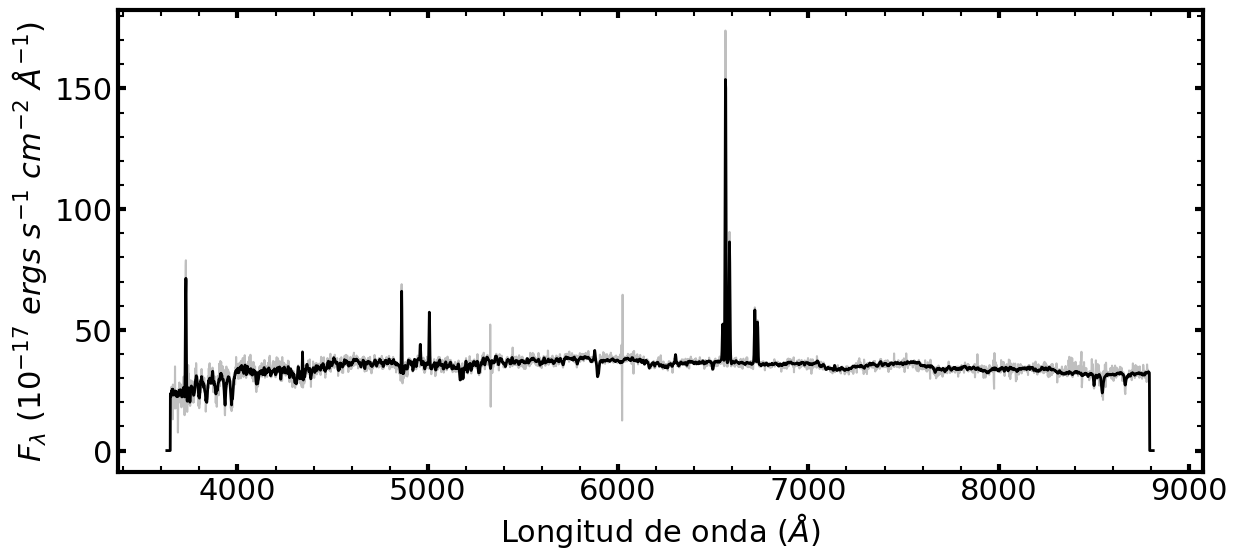

In [13]:
# Primero graficaremos con todos los valores por omisión -
# Requiere specobjid y z

index = 10     # Cambiar el valor entre 0 y N_table-1 para graficar diferentes espectros en el marco de reposo 

# Obteniendo los arreglos de longitud de onda, flujo, modelo e ivar para la fuente dada
wavelength, flux, model, ivar = get_sdss_spectra(specobjid[index], rest_frame = True)
plot_sdss_spectra(wavelength, flux, model, ivar, z[index])

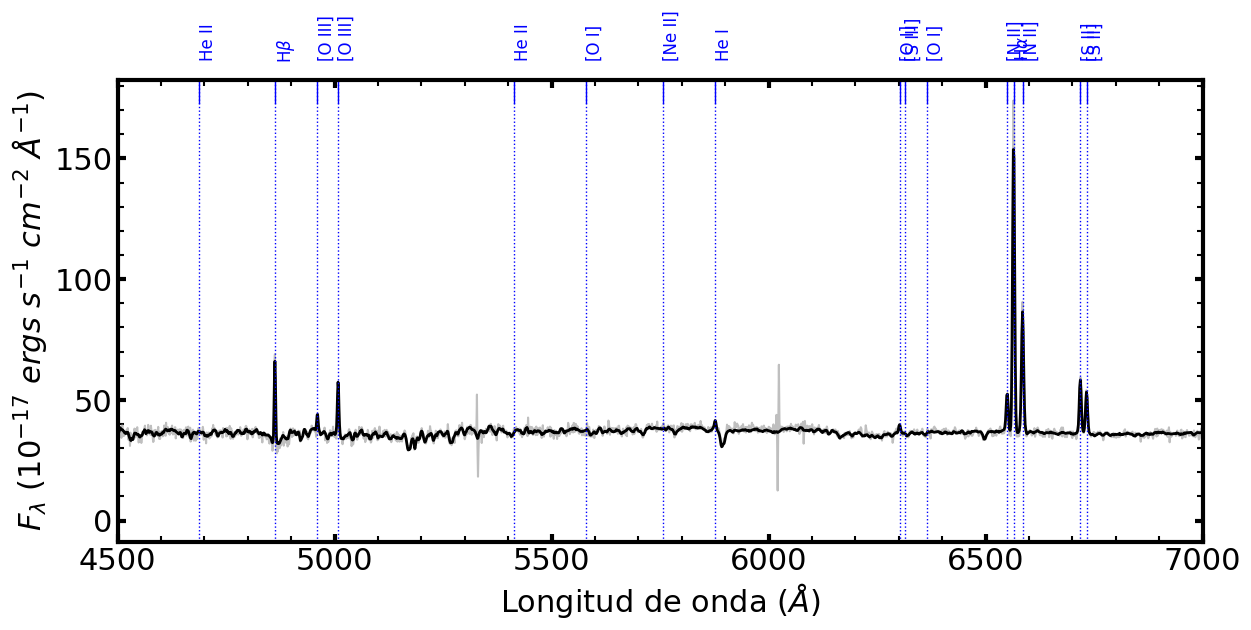

In [14]:
# Cambiando los valores por omisión de la función de graficado

index = 10           # Cambiar el valor entre 0 y N_table-1 para graficar diferentes espectros en el marco de reposo 

plot_sdss_spectra(wavelength, flux, model, ivar, z[index], rest_frame = True, \
                      xlim = [4500, 7000], ylim = None, \
                      spectra_kwargs = {'color': 'grey', 'alpha': 0.5}, \
                      model_kwargs = {'color': 'k', 'linewidth': 2.0},\
                      emission_lines = True, absorption_lines = True, \
                      em_lines = None,  abs_lines = [])

# El espectro real del SDSS se muestra en gris y el modelo en negro.
# Puedes cambiarlo a cualquier color que quieras usando las palabras clave spectra_kwargs y model_kwargs.

<a class="anchor" id="bpt"></a>
# Fuentes de ionización y el diagrama BPT

Las líneas de emisión en el espectro de galaxias pueden ser el resultado de varias fuentes de ionización, como formación estelar, AGN y choques.  
El diagrama BPT se construye a partir de las razones de líneas ópticas [OIII]/H$\beta$ y [NII]/H$\alpha$.  
La posición de cualquier galaxia en este espacio depende de la metalicidad del gas ionizado, la dureza de la radiación ionizante y el parámetro de ionización.  
Aquí consideramos cuatro clases de fuentes de excitación, que se ubican en diferentes posiciones del diagrama BPT según su fuente dominante de ionización -

* Galaxias Formadoras de Estrellas (SF)
* Seyferts (AGN de luminosidad moderada a alta)
* LINERs (Regiones de Emisión Nuclear de Baja Ionización; choques y/o AGN de baja luminosidad)
* Galaxias Compuestas (Mezcla de SF, choques y/o actividad AGN)

Para más información, ver una reseña reciente sobre la evolución de galaxias a partir de sus líneas de emisión por [Kewley et al. 2019](https://ui.adsabs.harvard.edu/abs/2019ARA%26A..57..511K/abstract).

In [15]:
# Calculando el logaritmo de las razones de líneas para el diagrama BPT -
Nii_Ha = np.log10(final_table['flux_nii_6583']/final_table['flux_ha_6562'])
Oiii_Hb = np.log10(final_table['flux_oiii_5006']/final_table['flux_hb_4861'])

In [16]:
# Asignando una variable para la columna bpt
bpt = final_table['bpt']   # Clasificación BPT

# Creando etiquetas para las diferentes clases basadas en la columna BPT - 
is_sf = (bpt == 'Star Forming')
is_sy = (bpt == 'Seyfert')
is_comp = (bpt == 'Composite')
is_liner = (bpt == 'LINER')

In [17]:
# Histograma bidimensional de densidad de todas las galaxias
dens_all,_,_ = np.histogram2d(Nii_Ha, Oiii_Hb, range=[[-2.0, 0.75],[-1.2, 1.2]], bins=100, density=True)
dens_all = dens_all.T

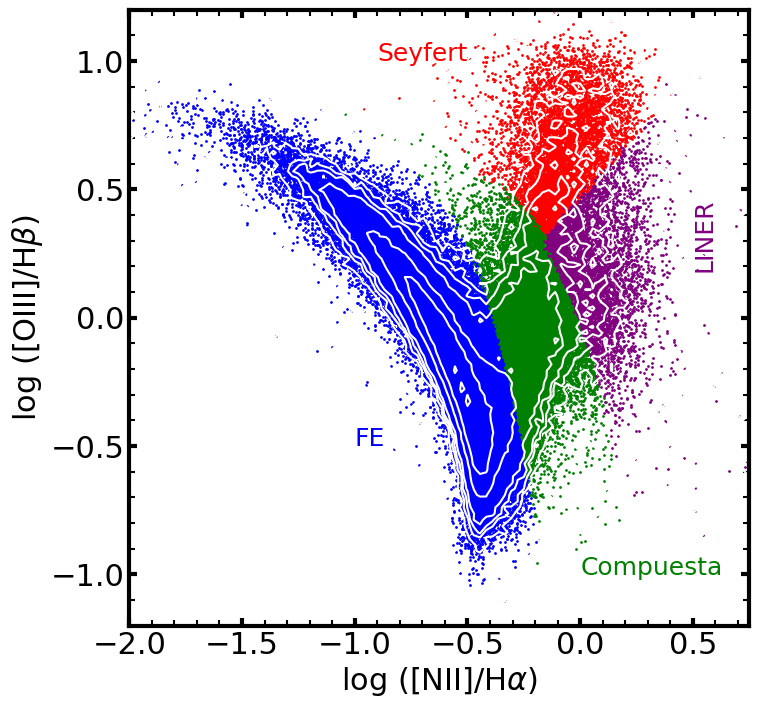

In [18]:
# Diagrama BPT coloreado según la clase
plt.figure(figsize = (8,8))
plt.scatter(Nii_Ha[is_sy], Oiii_Hb[is_sy], color = 'r', s = 1.0)             # Seyferts en rojo (r)
plt.scatter(Nii_Ha[is_sf], Oiii_Hb[is_sf], color = 'b', s = 1.0)             # SF en azul (b)
plt.scatter(Nii_Ha[is_comp], Oiii_Hb[is_comp], color = 'g', s = 1.0)         # Compuestas en verde (g)
plt.scatter(Nii_Ha[is_liner], Oiii_Hb[is_liner], color = 'purple', s = 1.0)  # LINERs en púrpura
plt.contour(dens_all, colors = 'white', extent = (-2.0, 0.75, -1.2, 1.2), levels = [0.0, 0.1, 0.2, 0.3, 0.5, 1.5, 3.0, 6.0])
plt.xlim([-2, 0.75])
plt.ylim([-1.2, 1.2])
plt.text(-1.0, -0.5, 'FE', color = 'blue', fontsize = 18)          # FE = Formadoras de Estrellas
plt.text(0.0, -1.0, 'Compuesta', color = 'green', fontsize = 18)
plt.text(0.5, 0.2, 'LINER', color = 'purple', fontsize = 18, rotation = 90)
plt.text(-0.9, 1.0, 'Seyfert', color = 'r', fontsize = 18)
plt.xlabel('log ([NII]/H$\\alpha$)')
plt.ylabel('log ([OIII]/H$\\beta$)')
plt.show()

A partir de este diagrama, podemos ver que los Seyferts y LINERs tienen valores más altos de [NII]/H$\alpha$ y [OIII]/H$\beta$ en comparación con las galaxias FE. En una nebulosa fotoionizada por estrellas jóvenes y masivas, la transición de baja ionización [NII] es débil. Un campo de radiación AGN intenso incrementa la producción de emisión de líneas prohibidas excitadas por colisión. Los LINERs tienen luminosidades menores que los Seyferts, requiriendo un campo de radiación ionizante más duro que las galaxias FE, pero un parámetro de ionización menor que los Seyferts. Pueden ser producidos por AGN de baja luminosidad, flujos de enfriamiento, vientos impulsados por estallidos estelares o gas calentado por choques. Los AGN tienden a residir en las galaxias más masivas y ricas en metales. Así, una contribución de AGN eleva la relación [NII]/H$\alpha$ por encima de la de las galaxias FE. Las Compuestas pueden contener una mezcla de FE, excitación por choques y/o actividad AGN.

<a class="anchor" id="stack_spectra"></a>
# Apilando espectros

El apilado de espectros es una técnica importante para estudiar las propiedades generales de las galaxias. Este proceso incrementa la relación señal-ruido y así resalta el continuo y las líneas de emisión con mayor claridad, pudiendo además revelar líneas débiles que rara vez se detectan en espectros individuales. Para observar las propiedades típicas de galaxias de las cuatro clases —FE, AGN, LINER y Compuestas— seleccionaremos galaxias aleatorias de cada clase y apilaremos sus espectros.

En esta sección, mostramos cómo alinear y apilar espectros de varias galaxias.

<a class="anchor" id="functions2"></a>
## Función para alinear y apilar espectros

Esta función recibe una tabla de objetos SDSS y devuelve los valores del espectro apilado. Aquí, llamará a la primera función `get_sdss_spectra`.

In [19]:
## Función 4 -

def stack_spectra(table):
    """
    Función para apilar los espectros de todas las fuentes en la tabla dada.
    Usa SPARCL para recuperar los espectros
    
    Devuelve un promedio ponderado por varianza inversa de los espectros de entrada.
    
    Parámetros
    ----------
    table : table
        Tabla de fuentes cuyos espectros deben ser apilados
    
    Devuelve
    -------
    wavelength_stack : array
        Array de longitudes de onda de los espectros apilados
        
    flux_stack : array
        Array de flujos de los espectros apilados
    
    model_stack : array
        Array de modelos de los espectros apilados
    
    """
    
    # Crear un array con los valores de loglam objetivo - array de referencia
    loglam_ref = np.arange(3.5000, 3.9000, 0.0001).astype('float32')
    
    # Crear listas vacías para flujo, ivar y modelo - 
    flux_array = []
    model_array = []
    ivar_array = []
    
    # Extraer las columnas necesarias de la tabla
    # redshift = table['z']
    specobjid = [int(s) for s in table['specobjid'].data]
    
    # Número de espectros - 
    n = len(table)
    
    ## Recuperar los espectros
    res = client.retrieve_by_specid(specid_list = specobjid, 
                                    include = ['sparcl_id', 'specid', 'redshift', 'flux', 'wavelength', 'model', 'ivar'],
                                    dataset_list = ['SDSS-DR16', 'BOSS-DR16'])
    
    ## Todos los espectros tienen el mismo espaciado en log de longitud de onda.
    ## Desplazamos los espectros en la longitud de onda observada para llenar el mismo rango de log de longitud de onda
    ## Unimos los diferentes arrays de los espectros individuales en un solo array
    
    ## Comparar el número de espectros recuperados con el número de espectros solicitados
    ## NOTA: algunos datasets tienen espectros faltantes con modelos de datos inconsistentes, los cuales serán añadidos
    ##       en la próxima re-ingestión. Estadísticas disponibles aquí: https://astrosparcl.datalab.noirlab.edu/sparc/datasetnotes/
    n_res = res.count
    n_use = np.min([n_res, n])
    if n_res!=n:
        print(f"ADVERTENCIA: {n_res} espectros fueron recuperados de los {n} solicitados! Se procederá con {n_use} espectros.")
        
    for ii in range(n_use):   
                
        ## Obtener espectros en reposo de cada objeto
        res_rec = res.records[ii]
        z = res_rec.redshift
        lam = res_rec.wavelength/(1+z)
        flux = res_rec.flux*(1+z)
        model = res_rec.model*(1+z)
        ivar = res_rec.ivar/((1+z)**2)
        
        loglam = np.around(np.log10(lam), 4).astype('float32')
        # El logaritmo de la longitud de onda de referencia y del rango de longitud de onda de cada espectro se convierten a 'float32'
        # Esto ayuda a evitar errores de redondeo
        
        # Crear arrays vacíos para flujo, varianza inversa y modelo 
        # con la misma longitud que el array de referencia loglam
        fl = np.zeros(len(loglam_ref))
        iv = np.zeros(len(loglam_ref))
        ml = np.zeros(len(loglam_ref))
        
        # truth_array - Array booleano que define qué píxeles del espectro han sido desplazados
        truth_array = np.zeros(len(loglam_ref), dtype = bool)
        
        # Encontrar elementos comunes entre la referencia y las longitudes de onda del espectro - 
        ll_common = np.intersect1d(loglam_ref, loglam)
        
        # Encontrar los índices del primer píxel en el array común en referencia y espectro
        ref_start = np.where(loglam_ref == ll_common[0])[0][0]
        spec_start = np.where(loglam == ll_common[0])[0][0]
        
        m = min(len(loglam_ref[ref_start:]), len(loglam[spec_start:]))
        
        # Alinear el primer píxel de los valores comunes de loglam con el array de referencia 
        # Marcar los píxeles correspondientes en truth_array como True
        truth_array[ref_start:ref_start+m] = True

        # Llenar los arrays de flujo, varianza inversa y modelo
        fl[truth_array] = flux[spec_start:spec_start+m]
        iv[truth_array] = ivar[spec_start:spec_start+m]
        ml[truth_array] = model[spec_start:spec_start+m]
        
        # Donde el array de referencia está vacío, llenar flujo y modelo con valores nan
        # Establecer varianza inversa a cero para estos píxeles
        fl[~truth_array] = np.nan
        iv[~truth_array] = 0.0
        ml[~truth_array] = np.nan
        
        # Crear un array enmascarado con valores 'nan' marcados
        # Esto evita los píxeles llenos de 'nan' al apilar
        fl = np.ma.masked_array(fl, np.isnan(fl))
        iv = np.ma.masked_array(iv, np.isnan(iv))
        ml = np.ma.masked_array(ml, np.isnan(ml))
        
        flux_array.append(fl)
        model_array.append(ml)
        ivar_array.append(iv)
        
    # Apilar los espectros por promedio ponderado 
    wavelength_stack = 10**(loglam_ref)
    flux_stack = np.ma.average(flux_array, axis = 0, weights = ivar_array)
    model_stack = np.ma.average(model_array, axis = 0, weights = ivar_array)
    
    flux_stack = flux_stack.filled(np.nan)
    model_stack = model_stack.filled(np.nan)
    
    return (wavelength_stack, flux_stack, model_stack)

<a class="anchor" id="select_bpt"></a>
## Selección de galaxias del diagrama BPT

Para comparar las propiedades espectrales generales de galaxias de las cuatro clases diferentes, seleccionamos al azar 100 galaxias de cada clase BPT para apilar sus espectros. Para ser consistentes, seleccionamos las galaxias de cuadrados de la misma área en las cuatro regiones.

In [20]:
## Definiendo los vértices de las esquinas inferiores izquierdas de los cuatro cuadrados
sy_x, sy_y = -0.15, 0.55
sf_x, sf_y = -0.65, -0.05
liner_x, liner_y = 0.0, 0.05
comp_x, comp_y = -0.25, 0.0

# Definiendo el tamaño de ancho y alto
width = 0.1
height = 0.1

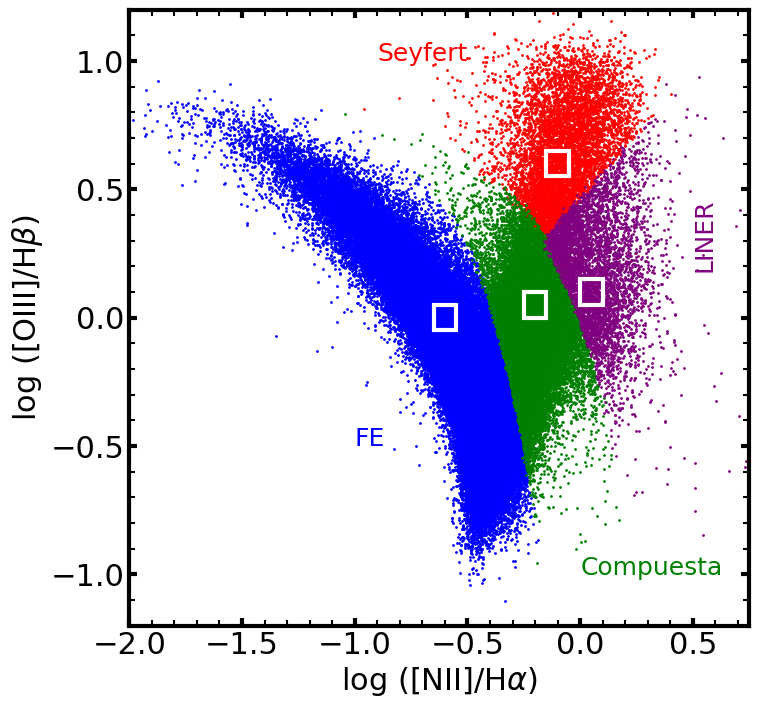

In [21]:
s1= Rectangle(xy = (sy_x, sy_y), width = width, height = height, color = 'white', lw = 3.0, fill = False)
s2 = Rectangle(xy = (sf_x, sf_y), width = width, height = height, color = 'white', lw = 3.0, fill = False)
s3 = Rectangle(xy = (liner_x, liner_y), width = width, height = height, color = 'white', lw = 3.0, fill = False)
s4 = Rectangle(xy = (comp_x, comp_y), width = width, height = height, color = 'white', lw = 3.0, fill = False)

plt.figure(figsize = (8,8))

plt.scatter(Nii_Ha[is_sy], Oiii_Hb[is_sy], color = 'r', s = 1.0)
plt.scatter(Nii_Ha[is_sf], Oiii_Hb[is_sf], color = 'b', s = 1.0)
plt.scatter(Nii_Ha[is_comp], Oiii_Hb[is_comp], color = 'g', s = 1.0)
plt.scatter(Nii_Ha[is_liner], Oiii_Hb[is_liner], color = 'purple', s = 1.0)
plt.gca().add_patch(s1)
plt.gca().add_patch(s2)
plt.gca().add_patch(s3)
plt.gca().add_patch(s4)
plt.text(-1.0, -0.5, 'FE', color = 'blue', fontsize = 18)
plt.text(0.0, -1.0, 'Compuesta', color = 'green', fontsize = 18)
plt.text(0.5, 0.2, 'LINER', color = 'purple', fontsize = 18, rotation = 90)
plt.text(-0.9, 1.0, 'Seyfert', color = 'r', fontsize = 18)
plt.xlim([-2, 0.75])
plt.ylim([-1.2, 1.2])
plt.xlabel('log ([NII]/H$\\alpha$)')
plt.ylabel('log ([OIII]/H$\\beta$)')

plt.show()

En esta figura, los cuatro cuadros blancos muestran las regiones desde donde realizaremos la selección aleatoria de galaxias.

In [22]:
# Regiones de los cuadros blancos - 
# Obteniendo los índices de las fuentes dentro de los cuatro cuadros
sy_box = np.where((Nii_Ha >= sy_x) & (Nii_Ha <= sy_x+width) & (Oiii_Hb >= sy_y) & (Oiii_Hb <= sy_y+height))[0]
sf_box = np.where((Nii_Ha >= sf_x) & (Nii_Ha <= sf_x+width) & (Oiii_Hb >= sf_y) & (Oiii_Hb <= sf_y+height))[0]
liner_box = np.where((Nii_Ha >= liner_x) & (Nii_Ha <= liner_x+width) & (Oiii_Hb >= liner_y) & (Oiii_Hb <= liner_y+height))[0]
comp_box = np.where((Nii_Ha >= comp_x) & (Nii_Ha <= comp_x+width) & (Oiii_Hb >= comp_y) & (Oiii_Hb <= comp_y+height))[0]

In [23]:
len(final_table[sy_box]), len(final_table[sf_box]), len(final_table[comp_box]), len(final_table[liner_box])

(396, 4464, 1188, 341)

In [24]:
# Seleccionando 100 fuentes de cada cuadro y uniendo sus filas en una tabla
n = 100

# Índices de 100 objetos dentro de cada cuadro
sy_sel = np.sort(random.sample(list(sy_box), n))
sf_sel = np.sort(random.sample(list(sf_box), n))
liner_sel = np.sort(random.sample(list(liner_box), n))
comp_sel = np.sort(random.sample(list(comp_box), n))

# Tablas de las selecciones
tab_sy = final_table[sy_sel]
tab_sf = final_table[sf_sel]
tab_liner = final_table[liner_sel]
tab_comp = final_table[comp_sel]

In [25]:
# Espectros apilados para las 100 fuentes dentro de cada cuadro blanco
lam_sy, flux_sy, model_sy = stack_spectra(tab_sy)
lam_sf, flux_sf, model_sf = stack_spectra(tab_sf)
lam_liner, flux_liner, model_liner = stack_spectra(tab_liner)
lam_comp, flux_comp, model_comp = stack_spectra(tab_comp)

<a class="anchor" id="plot_stack"></a>

## Graficando espectros apilados

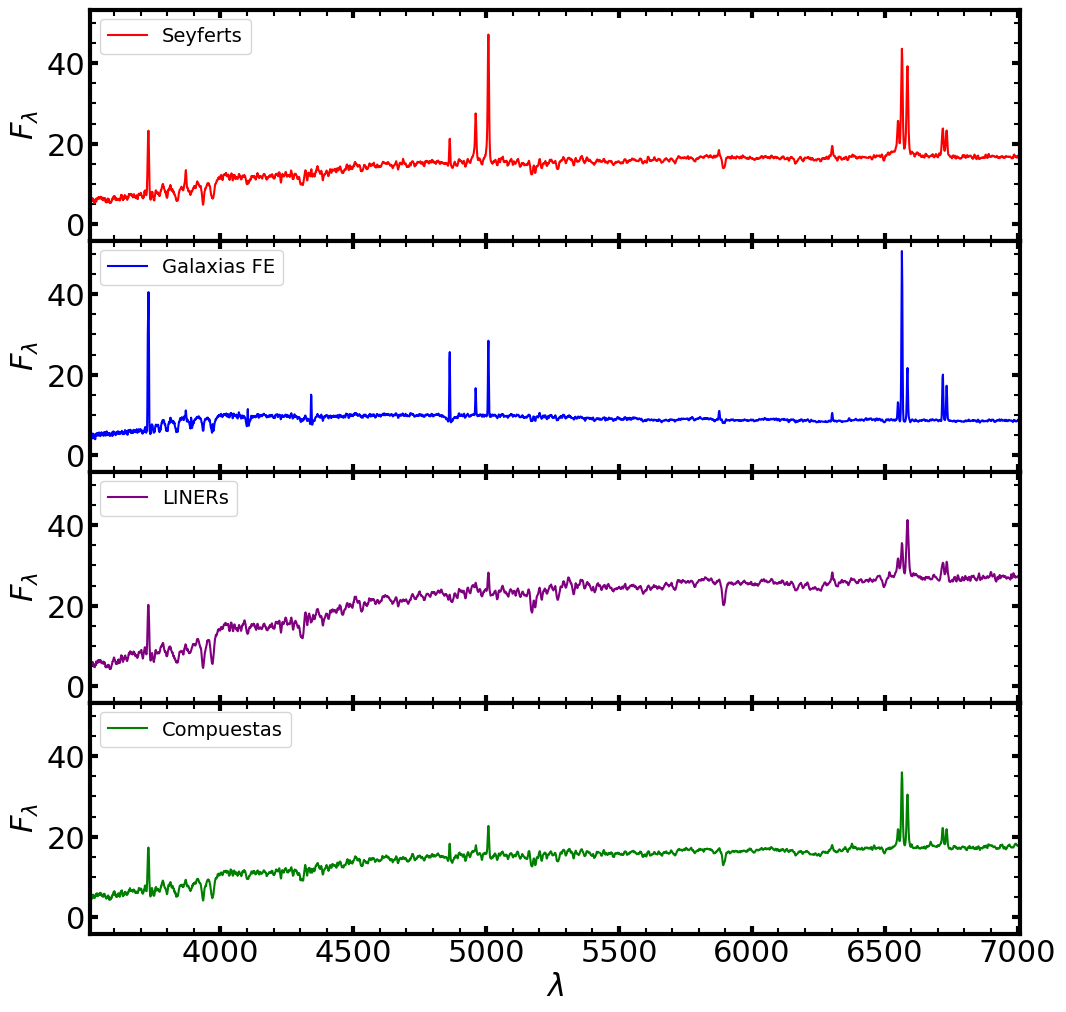

In [26]:
fig, axs = plt.subplots(4,1, figsize = (12, 12), sharex = True, sharey = True)
plt.subplots_adjust(wspace = 0., hspace = 0.)

axs[0].plot(lam_sy, flux_sy, color = 'r', label = 'Seyferts')
axs[0].legend(fontsize = 14, loc = 'upper left')
axs[0].set_ylabel('$F_{\lambda}$')

axs[1].plot(lam_sf, flux_sf, color = 'b', label = 'Galaxias FE')
axs[1].legend(fontsize = 14, loc = 'upper left')
axs[1].set_ylabel('$F_{\lambda}$')

axs[2].plot(lam_liner, flux_liner, color = 'purple', label = 'LINERs')
axs[2].legend(fontsize = 14, loc = 'upper left')
axs[2].set_ylabel('$F_{\lambda}$')

axs[3].plot(lam_comp, flux_comp, color = 'g', label = 'Compuestas')
axs[3].legend(fontsize = 14, loc = 'upper left')
axs[3].set_xlim([3510, 7010])
axs[3].set_xlabel('$\lambda$')
axs[3].set_ylabel('$F_{\lambda}$');

Aquí hay algunas propiedades de las galaxias que podemos inferir a partir de los espectros apilados anteriores:  
* El salto de 4000$\mathring A$ es menos significativo en las galaxias FE en comparación con las otras tres clases. Esto es esperado porque el salto de 4000$\mathring A$ se ve realzado en poblaciones estelares viejas, y las galaxias FE definitivamente tienen estrellas más jóvenes.  
* La importancia relativa de las líneas Ca II H($\lambda$3969) y K($\lambda$3934) ayuda a identificar la importancia relativa de poblaciones jóvenes y viejas. Esto puede observarse nuevamente en las galaxias FE, cuando H es ligeramente más fuerte que la línea K. En Seyferts, LINERs y Compuestas, domina la población vieja, ya que la línea K es mayor que la línea H.  
* La relación entre [NII]$\lambda$6583 y H$\alpha$ proporciona una estimación de la metalicidad del gas en las galaxias. En promedio, vemos que Seyferts y LINERs tienen mayor metalicidad del gas que las galaxias FE y Compuestas. En general, [NII]/H$\alpha$ varía como función tanto de la metalicidad como del nivel de ionización.  
* [OIII]$\lambda$4363 solo puede observarse en el espectro apilado de galaxias FE. Esto puede ser un indicador de baja metalicidad.  
* La línea de absorción NaI D ($\lambda$5891) depende de la cantidad de enrojecimiento interestelar en las galaxias. Podemos ver que esto es significativo en LINERs comparado con las otras tres clases, lo que indica que los LINERs tienen una extinción de polvo considerable. La extinción por polvo también puede observarse en Seyferts y Compuestas, pero es más débil que en LINERs.  
* Los LINERs tienen el continuo estelar más rojo, consistente con que residen en galaxias más masivas (quiescentes).  

A partir de estas diferentes observaciones, podemos concluir que las galaxias FE tienen una población estelar joven y de menor metalicidad, en comparación con Seyferts, LINERs y Compuestas. Ahora vamos a observar las líneas de emisión usadas para construir el diagrama BPT. Estas líneas proporcionan información sobre los mecanismos de ionización en las galaxias.

## Acercamiento a las líneas BPT

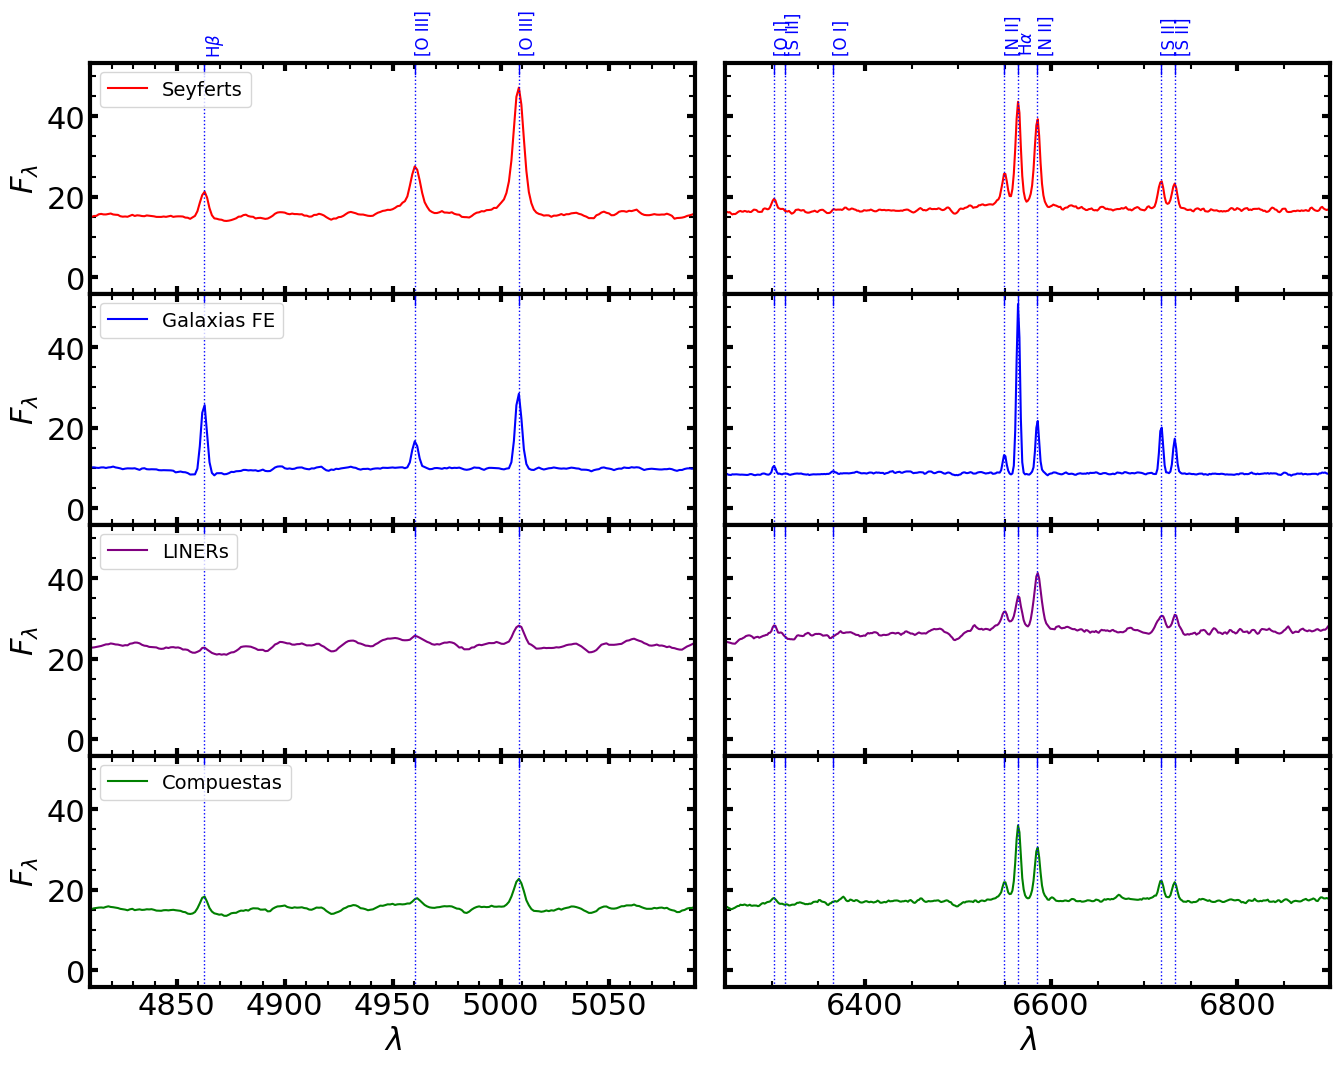

In [27]:
fig, axs = plt.subplots(4,2, figsize = (16,12), sharey = True, sharex = 'col')
plt.subplots_adjust(wspace = 0.05, hspace = 0.0)

axs[0][0].plot(lam_sy, flux_sy, color = 'r', label = 'Seyferts')
axs[0][0].legend(fontsize = 14, loc = 'upper left')
axs[0][0].set_ylabel('$F_{\lambda}$')
axs[0][0].set_xlim([4810, 5090])
add_lines(ax = axs[0][0], z=0, abs_lines = [])

axs[1][0].plot(lam_sf, flux_sf, color = 'b', label = 'Galaxias FE')
axs[1][0].legend(fontsize = 14, loc = 'upper left')
axs[1][0].set_ylabel('$F_{\lambda}$')
add_lines(ax = axs[1][0], z=0, rest_frame = True, abs_lines = [], em_label = False)

axs[2][0].plot(lam_liner, flux_liner, color = 'purple', label = 'LINERs')
axs[2][0].legend(fontsize = 14, loc = 'upper left')
axs[2][0].set_ylabel('$F_{\lambda}$')
axs[2][0].set_xlabel('$\lambda$')
add_lines(ax = axs[2][0], z=0, rest_frame = True, abs_lines = [], em_label = False)
                
axs[3][0].plot(lam_comp, flux_comp, color = 'g', label = 'Compuestas')
axs[3][0].legend(fontsize = 14, loc = 'upper left')
axs[3][0].set_ylabel('$F_{\lambda}$')
axs[3][0].set_xlabel('$\lambda$')
add_lines(ax = axs[3][0], z=0, rest_frame = True, abs_lines = [], em_label = False)

axs[0][1].plot(lam_sy, flux_sy, color = 'r', label = 'Seyferts')
axs[0][1].set_xlim([6250, 6900])
add_lines(ax = axs[0][1], z=0, rest_frame = True, abs_lines = [])

axs[1][1].plot(lam_sf, flux_sf, color = 'b', label = 'Galaxias FE')
add_lines(ax = axs[1][1], z=0, rest_frame = True, abs_lines = [], em_label = False)

axs[2][1].plot(lam_liner, flux_liner, color = 'purple', label = 'LINERs')
add_lines(ax = axs[2][1], z=0, rest_frame = True, abs_lines = [], em_label = False)

axs[3][1].plot(lam_comp, flux_comp, color = 'g', label = 'Compuestas')
axs[3][1].set_xlabel('$\lambda$')
add_lines(ax = axs[3][1], z=0, rest_frame = True, abs_lines = [], em_label = False)

A partir de la figura anterior, podemos inferir lo siguiente:  
   * [OIII]$\lambda$5007 es la línea más fuerte en Seyferts; la luminosidad de esta línea es un indicador de la actividad AGN.  
   * La línea H$\alpha$ es un indicador de formación estelar. Podemos ver claramente que es la más fuerte para las galaxias FE.  
   * Los flujos relativos de las líneas [NII]$\lambda$6853 y H$\alpha$ son un indicador de las condiciones de ionización de la nebulosa. Cuando la nebulosa es ionizada por un estallido estelar, [NII] << H$\alpha$, mientras que una radiación ionizante más dura como la de un AGN aumenta el flujo de [NII] de tal manera que [NII] > H$\alpha$. Esto puede observarse en Seyferts y LINERs. La relación entre [NII]$\lambda$6583 y H$\alpha$ también es un indicador de la metalicidad del gas en la galaxia. Es difícil separar los efectos de ambos con la información disponible actualmente.  
   * Un campo de radiación de mayor ionización y parámetros de ionización más altos llevan a un mayor [OIII]$\lambda$5007/H$\beta$.  
   * Los LINERs tienen líneas de emisión débiles en comparación con otras clases. Además de la posibilidad de ser producidas por AGN de baja ionización, la emisión tipo LINER también puede producirse en flujos de enfriamiento, vientos y choques.

Apilar los espectros es, por lo tanto, una herramienta muy valiosa para comprender las propiedades de las galaxias.

#### <a class="anchor" id="resources"></a>
# Recursos

- SPARCL: https://astrosparcl.datalab.noirlab.edu/sparc/

- AGN Diagnostic Diagram website including a section on [optical BPT emission-line diagnostic](https://sites.google.com/site/agndiagnostics/home/bpt)

- Information about the galaxy properties from the Portsmouth Group: https://www.sdss.org/dr16/spectro/galaxy_portsmouth/

- Portsmouth stellar kinematics and emission line fluxes https://www.sdss.org/dr16/spectro/galaxy_portsmouth/#kinematics

- SDSS Spectra Basics: https://www.sdss.org/dr16/spectro/spectro_basics/#IdentifyingSDSSspectra

- SDSS Spectroscopic Data Reduction and access formats: https://www.sdss.org/dr16/spectro/pipeline/#SpectroscopicDataReduction

- Schema details about the emissionlinesport catalog can be found both on the [Data Lab Table Browser](https://datalab.noirlab.edu/query.php?name=sdss_dr12.emissionlinesport)
and on the [SDSS Skyserver webpage](http://skyserver.sdss.org/dr16/en/help/browser/browser.aspx#&&history=description+emissionLinesPort+U)

# Referencias

[Baldwin et. al., 1981](https://ui.adsabs.harvard.edu/abs/1981PASP...93....5B/abstract)  
[Kauffmann et al. 2003](https://ui.adsabs.harvard.edu/abs/2003MNRAS.346.1055K/abstract)  
[Kewley et al. 2001](https://ui.adsabs.harvard.edu/abs/2001ApJ...556..121K/abstract)  
[Kewley et al. 2019](https://ui.adsabs.harvard.edu/abs/2019ARA%26A..57..511K/abstract)  
[Maraston & Stromback (2011)](https://ui.adsabs.harvard.edu/abs/2011MNRAS.418.2785M/abstract)  
[Sarzi et al.2006](https://ui.adsabs.harvard.edu/abs/2006MNRAS.366.1151S/abstract)  
[Schawinski et al. 2007](https://ui.adsabs.harvard.edu/abs/2007MNRAS.382.1415S/abstract)  
[Thomas et al.2013](https://ui.adsabs.harvard.edu/abs/2013MNRAS.431.1383T/abstract)